In [1]:
import torch
import torch.utils.data as data
import pandas as pd
import matplotlib.pyplot as plt
from src.error_measures import collect_stats, print_average_stats, gather_predictions
from src.models import MultiLayerANN, SynapticSNN, LeakySNN, DoubleLeakySNN
from src.train_model import training_loop, training_loop_stats
from src.graphs import multiple_models_one_x, multiple_models_multi_x, scatter_plots

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [3]:
def multiple_trainings(dataset, trials=3, hidden=5000, epochs=(120, 62, 30, 37)):
    err_model1 = [0., 0., 0., 0., 0., 0.]
    err_model2 = [0., 0., 0., 0., 0., 0.]
    err_model3 = [0., 0., 0., 0., 0., 0.]
    err_model4 = [0., 0., 0., 0., 0., 0.]

    for i in range(trials):
        # Prepare data loaders.
        train_dataset, test_dataset = torch.utils.data.random_split(dataset, (round(0.8 * len(dataset)), round(0.2 * len(dataset))))
        train_loader = data.DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
        test_loader = data.DataLoader(test_dataset, batch_size=256, shuffle=False, drop_last=False)

        # Prepare models.
        model1 = MultiLayerANN(num_inputs=8, num_hidden=hidden, num_outputs=1)
        model2 = LeakySNN(num_inputs=8, num_hidden=hidden, num_outputs=1, num_steps=25)
        model3 = SynapticSNN(num_inputs=8, num_hidden=hidden, num_outputs=1, num_steps=50)
        model4 = DoubleLeakySNN(num_inputs=8, num_hidden=hidden, num_outputs=1, num_steps=25)

        # Train models.
        print(f'------------------------------------\nTraining {i+1}')
        training_loop(model1, train_loader, device, num_epochs=epochs[0]) #90
        training_loop(model2, train_loader, device, num_epochs=epochs[1]) #50
        training_loop(model3, train_loader, device, num_epochs=epochs[2]) #25
        training_loop(model4, train_loader, device, num_epochs=epochs[3]) #35

        # Gather results.
        collect_stats(model1, err_model1, test_loader, device)
        collect_stats(model2, err_model2, test_loader, device)
        collect_stats(model3, err_model3, test_loader, device)
        collect_stats(model4, err_model4, test_loader, device)

        # Print average results.
    print('------Simple ANN ------')
    print_average_stats(err_model1, trials)
    print('------LIF SNN ------')
    print_average_stats(err_model2, trials)
    print('------Synaptic SNN ------')
    print_average_stats(err_model3, trials)
    print('------Double LIF SNN ------')
    print_average_stats(err_model4, trials)

## Data 6h

In [4]:
data06 = pd.read_csv("../data/processed/target06.csv")
data06.drop(columns=["weekday"], inplace=True)
all_data = data.TensorDataset(torch.from_numpy((data06.values[:,:-1] - data06.values[:,:-1].min(0)) / data06.values[:,:-1].ptp(0)).float(),
                              torch.from_numpy(data06.values[:,-1]).float())  # with normalization

In [5]:
multiple_trainings(all_data, trials=5, hidden=5000, epochs=(97,50,25,27))

------------------------------------
Training 1


100%|██████████| 27/27 [04:31<00:00, 10.05s/it]


------------------------------------
Training 2


100%|██████████| 27/27 [04:30<00:00, 10.02s/it]


------------------------------------
Training 3


100%|██████████| 27/27 [04:30<00:00, 10.03s/it]


------------------------------------
Training 4


100%|██████████| 27/27 [04:31<00:00, 10.04s/it]


------------------------------------
Training 5


100%|██████████| 27/27 [04:32<00:00, 10.10s/it]


------Simple ANN ------
MAE: 6.592936404343973, MSE:87.93934387903337,
RMSE: 9.37659548922946, IA: 0.8679955592333345,
MAPE: 42.60926733625608 %, acc: 47.93 %

------LIF SNN ------
MAE: 5.6177895881379865, MSE:62.56295483789019,
RMSE: 7.909306331272903, IA: 0.9140431695525179,
MAPE: 35.6683720050906 %, acc: 53.674 %

------Synaptic SNN ------
MAE: 5.228989598325566, MSE:51.594871584032475,
RMSE: 7.181364342136365, IA: 0.931994926106405,
MAPE: 34.12188482864699 %, acc: 55.803999999999995 %

------Double LIF SNN ------
MAE: 6.002467038920849, MSE:72.83504337822532,
RMSE: 8.533851903626394, IA: 0.8957485639946,
MAPE: 38.12433680596395 %, acc: 52.57799999999999 %



## Data 12h

In [6]:
data12 = pd.read_csv("../data/processed/target12.csv")
data12.drop(columns=["weekday"], inplace=True)
all_data = data.TensorDataset(torch.from_numpy((data12.values[:,:-1] - data12.values[:,:-1].min(0)) / data12.values[:,:-1].ptp(0)).float(),
                              torch.from_numpy(data12.values[:,-1]).float())  # with normalization

In [7]:
multiple_trainings(all_data, trials=5, hidden=5000, epochs=(97,50,25,27))

------------------------------------
Training 1


100%|██████████| 27/27 [04:31<00:00, 10.06s/it]


------------------------------------
Training 2


100%|██████████| 27/27 [04:31<00:00, 10.05s/it]


------------------------------------
Training 3


100%|██████████| 27/27 [04:30<00:00, 10.00s/it]


------------------------------------
Training 4


100%|██████████| 27/27 [04:30<00:00, 10.00s/it]


------------------------------------
Training 5


100%|██████████| 27/27 [04:29<00:00,  9.98s/it]


------Simple ANN ------
MAE: 8.032342969528631, MSE:129.61101303032942,
RMSE: 11.381955631213415, IA: 0.7799990785517663,
MAPE: 54.315441693502564 %, acc: 39.292 %

------LIF SNN ------
MAE: 6.529507531555476, MSE:87.27359925606181,
RMSE: 9.33826308929893, IA: 0.874066700991486,
MAPE: 43.62356929186307 %, acc: 47.577999999999996 %

------Synaptic SNN ------
MAE: 6.061185389979033, MSE:71.4362224361902,
RMSE: 8.44926512847699, IA: 0.9043539038640235,
MAPE: 40.55258868075289 %, acc: 50.478 %

------Double LIF SNN ------
MAE: 7.257227106718725, MSE:108.02996500686882,
RMSE: 10.3889336619, IA: 0.8302005767536361,
MAPE: 48.516848748761994 %, acc: 43.964 %



## Data 24h

In [8]:
data24 = pd.read_csv("../data/processed/target24.csv")
data24.drop(columns=["weekday"], inplace=True)
all_data = data.TensorDataset(torch.from_numpy((data24.values[:,:-1] - data24.values[:,:-1].min(0)) / data24.values[:,:-1].ptp(0)).float(),
                              torch.from_numpy(data24.values[:,-1]).float())  # with normalization

In [9]:
multiple_trainings(all_data, trials=5, hidden=5000, epochs=(97,50,25,27))

------------------------------------
Training 1


100%|██████████| 27/27 [04:30<00:00, 10.03s/it]


------------------------------------
Training 2


100%|██████████| 27/27 [04:31<00:00, 10.04s/it]


------------------------------------
Training 3


100%|██████████| 27/27 [04:33<00:00, 10.13s/it]


------------------------------------
Training 4


100%|██████████| 27/27 [04:32<00:00, 10.10s/it]


------------------------------------
Training 5


100%|██████████| 27/27 [04:32<00:00, 10.07s/it]


------Simple ANN ------
MAE: 8.446944233072482, MSE:146.7114265713086,
RMSE: 12.103782751323628, IA: 0.7095973433652327,
MAPE: 57.263044289886615 %, acc: 38.141999999999996 %

------LIF SNN ------
MAE: 7.110067349814234, MSE:102.5375453770524,
RMSE: 10.120818148055745, IA: 0.833523590595801,
MAPE: 47.42586487623039 %, acc: 44.9 %

------Synaptic SNN ------
MAE: 6.569236933550518, MSE:82.32408232791884,
RMSE: 9.065782499549794, IA: 0.8798263409604636,
MAPE: 46.04733493739345 %, acc: 47.291999999999994 %

------Double LIF SNN ------
MAE: 7.906356555354996, MSE:129.0650745809722,
RMSE: 11.353493988139196, IA: 0.7595103938281673,
MAPE: 53.83528448452464 %, acc: 41.544 %



### Epoch graphs

In [10]:
font = {'family' : 'calibri',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

In [30]:
all_data = data.TensorDataset(torch.from_numpy((data06.values[:,:-1] - data06.values[:,:-1].min(0)) / data06.values[:,:-1].ptp(0)).float(),
                              torch.from_numpy(data06.values[:,-1]).float())  # with normalization
train_dataset, test_dataset = torch.utils.data.random_split(all_data, (round(0.8 * len(all_data)), round(0.2 * len(all_data))))
train_loader = data.DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
test_loader = data.DataLoader(test_dataset, batch_size=256, shuffle=False, drop_last=False)

In [31]:
model1 = MultiLayerANN(num_inputs=8, num_hidden=5000, num_outputs=1)
model2 = LeakySNN(num_inputs=8, num_hidden=5000, num_outputs=1, num_steps=25)
model3 = SynapticSNN(num_inputs=8, num_hidden=5000, num_outputs=1, num_steps=50)
model4 = DoubleLeakySNN(num_inputs=8, num_hidden=5000, num_outputs=1, num_steps=25)

In [32]:
m1_stats, _ = training_loop_stats(model1, train_loader, test_loader, device, num_epochs=25, collect_stats=True, collect_time=False)
m2_stats, _ = training_loop_stats(model2, train_loader, test_loader, device, num_epochs=25, collect_stats=True, collect_time=False)
m3_stats, _ = training_loop_stats(model3, train_loader, test_loader, device, num_epochs=25, collect_stats=True, collect_time=False)
m4_stats, _ = training_loop_stats(model4, train_loader, test_loader, device, num_epochs=25, collect_stats=True, collect_time=False)

100%|██████████| 25/25 [04:25<00:00, 10.63s/it]


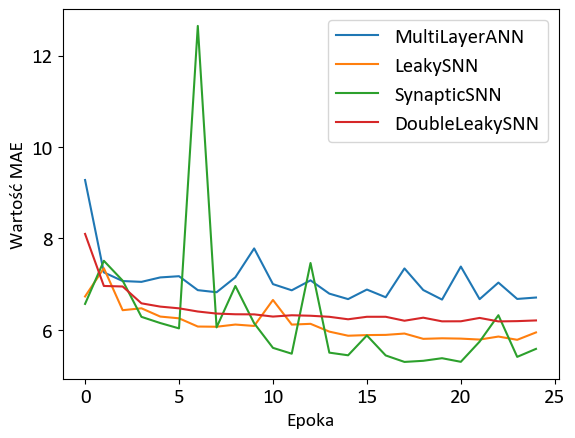

In [33]:
img0 = multiple_models_one_x(range(25), [m1_stats[0], m2_stats[0], m3_stats[0], m4_stats[0]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                            x_label="Epoka", y_label="Wartość MAE", textsize=14)

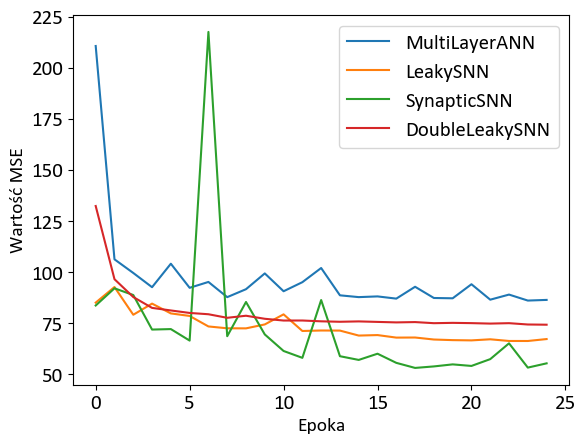

In [34]:
img1 = multiple_models_one_x(range(25), [m1_stats[1], m2_stats[1], m3_stats[1], m4_stats[1]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                            x_label="Epoka", y_label="Wartość MSE", textsize=14)

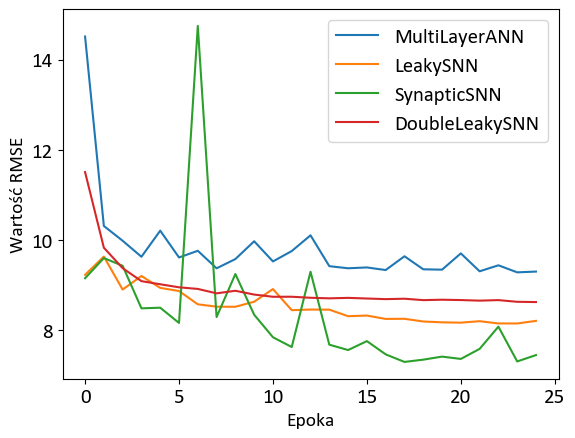

In [35]:
img2 = multiple_models_one_x(range(25), [m1_stats[2], m2_stats[2], m3_stats[2], m4_stats[2]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                             x_label="Epoka", y_label="Wartość RMSE", textsize=14)

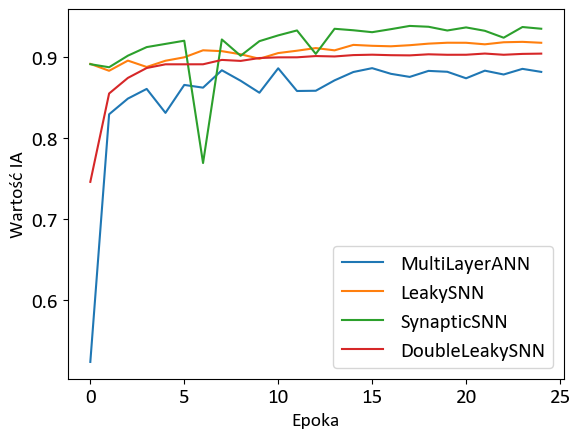

In [36]:
img3 = multiple_models_one_x(range(25), [m1_stats[3], m2_stats[3], m3_stats[3], m4_stats[3]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                             x_label="Epoka", y_label="Wartość IA", textsize=14)

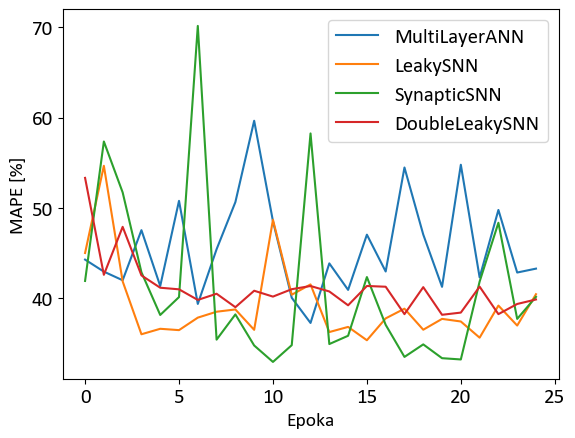

In [37]:
img4 = multiple_models_one_x(range(25), [m1_stats[4], m2_stats[4], m3_stats[4], m4_stats[4]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                             x_label="Epoka", y_label="MAPE [%]", textsize=14)

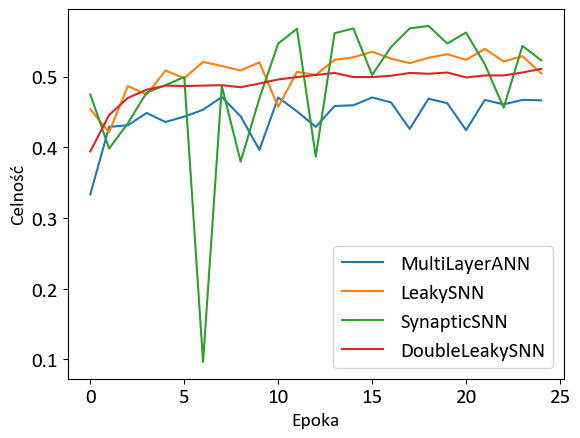

In [38]:
img5 = multiple_models_one_x(range(25), [m1_stats[5], m2_stats[5], m3_stats[5], m4_stats[5]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                             x_label="Epoka", y_label="Celność", textsize=14)

### Time graphs

In [20]:
model1 = MultiLayerANN(num_inputs=8, num_hidden=5000, num_outputs=1)
model2 = LeakySNN(num_inputs=8, num_hidden=5000, num_outputs=1, num_steps=25)
model3 = SynapticSNN(num_inputs=8, num_hidden=5000, num_outputs=1, num_steps=50)
model4 = DoubleLeakySNN(num_inputs=8, num_hidden=5000, num_outputs=1, num_steps=25)

In [21]:
m1_stats, m1_times = training_loop_stats(model1, train_loader, test_loader, device, num_epochs=97, collect_stats=True, collect_time=True)
m2_stats, m2_times = training_loop_stats(model2, train_loader, test_loader, device, num_epochs=50, collect_stats=True, collect_time=True)
m3_stats, m3_times = training_loop_stats(model3, train_loader, test_loader, device, num_epochs=25, collect_stats=True, collect_time=True)
m4_stats, m4_times = training_loop_stats(model4, train_loader, test_loader, device, num_epochs=27, collect_stats=True, collect_time=True)

100%|██████████| 27/27 [04:45<00:00, 10.58s/it]


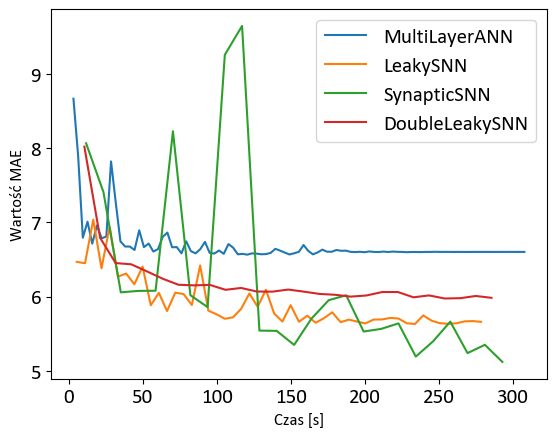

In [22]:
tm0 = multiple_models_multi_x([m1_times, m2_times, m3_times, m4_times], [m1_stats[0], m2_stats[0], m3_stats[0], m4_stats[0]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                             x_label="Czas [s]", y_label="Wartość MAE", textsize=14)

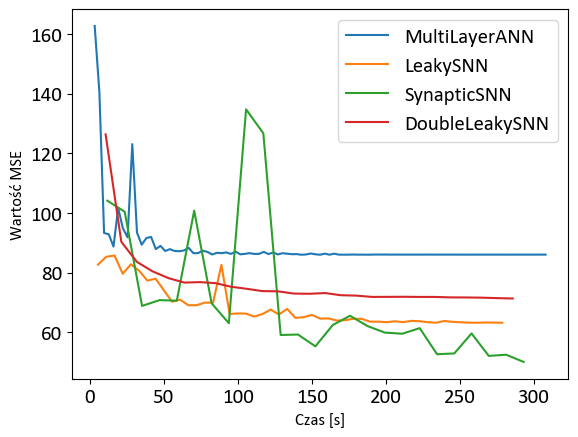

In [23]:
tm1 = multiple_models_multi_x([m1_times, m2_times, m3_times, m4_times], [m1_stats[1], m2_stats[1], m3_stats[1], m4_stats[1]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                        x_label="Czas [s]", y_label="Wartość MSE", textsize=14)

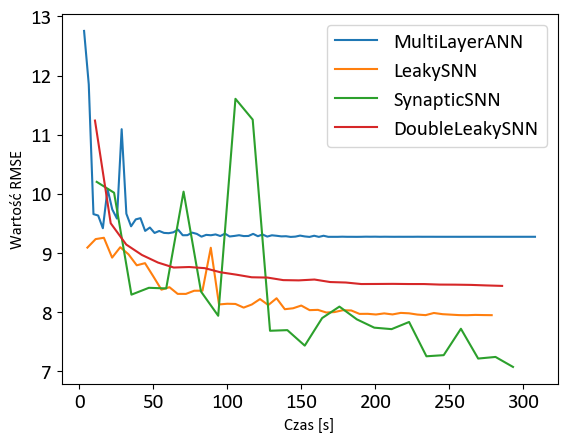

In [24]:
tm2 = multiple_models_multi_x([m1_times, m2_times, m3_times, m4_times], [m1_stats[2], m2_stats[2], m3_stats[2], m4_stats[2]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                        x_label="Czas [s]", y_label="Wartość RMSE", textsize=14)

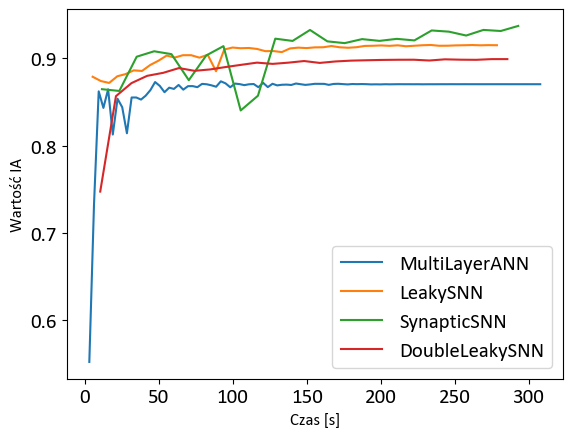

In [25]:
tm3 = multiple_models_multi_x([m1_times, m2_times, m3_times, m4_times], [m1_stats[3], m2_stats[3], m3_stats[3], m4_stats[3]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                        x_label="Czas [s]", y_label="Wartość IA", textsize=14)

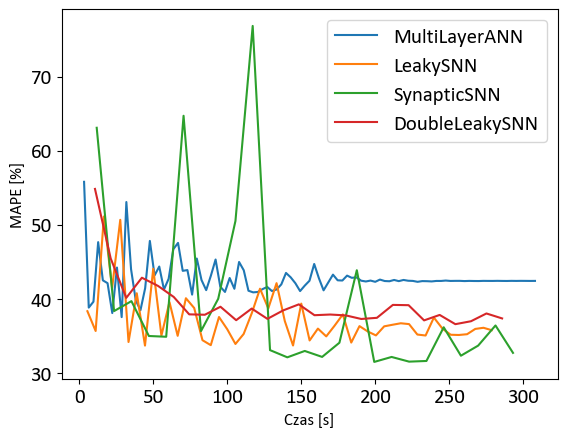

In [26]:
tm4 = multiple_models_multi_x([m1_times, m2_times, m3_times, m4_times], [m1_stats[4], m2_stats[4], m3_stats[4], m4_stats[4]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                        x_label="Czas [s]", y_label="MAPE [%]", textsize=14)

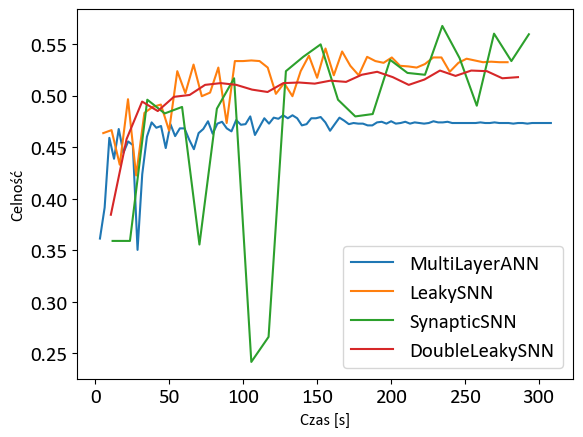

In [27]:
tm5 = multiple_models_multi_x([m1_times, m2_times, m3_times, m4_times], [m1_stats[5], m2_stats[5], m3_stats[5], m4_stats[5]], legend=["MultiLayerANN", "LeakySNN", "SynapticSNN", "DoubleLeakySNN"],
                        x_label="Czas [s]", y_label="Celność", textsize=14)

### Scatter plots

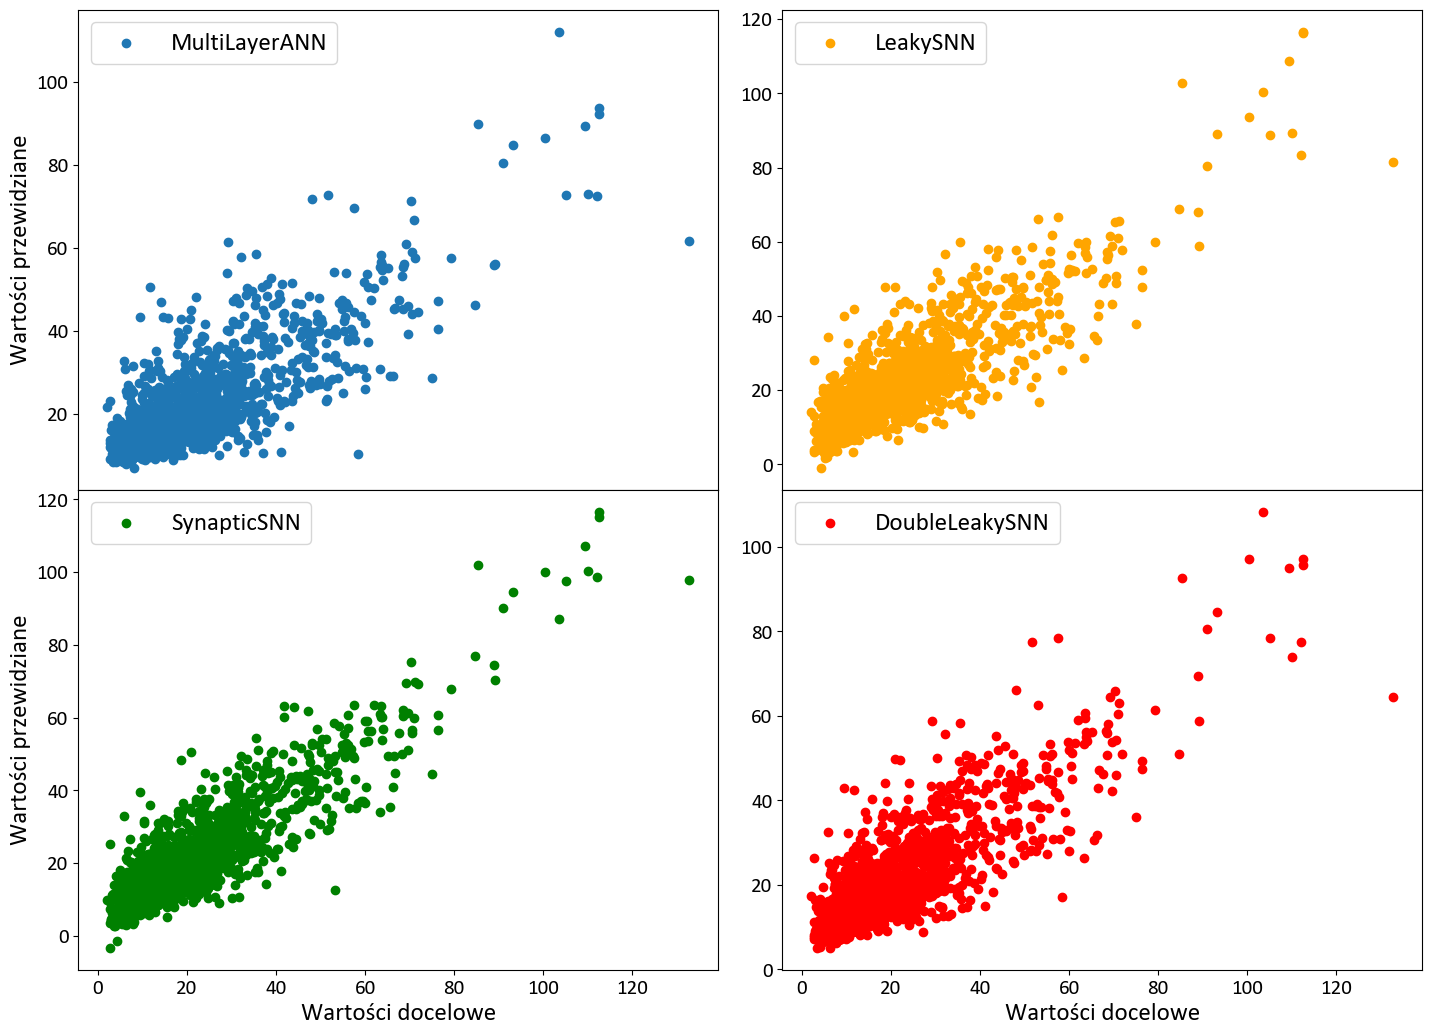

In [28]:
targets1, preds1 = gather_predictions(model1, test_loader, device)
targets2, preds2 = gather_predictions(model2, test_loader, device)
targets3, preds3 = gather_predictions(model3, test_loader, device)
targets4, preds4 = gather_predictions(model4, test_loader, device)
scatter_plots([targets1, targets2, targets3, targets4], [preds1, preds2, preds3, preds4])